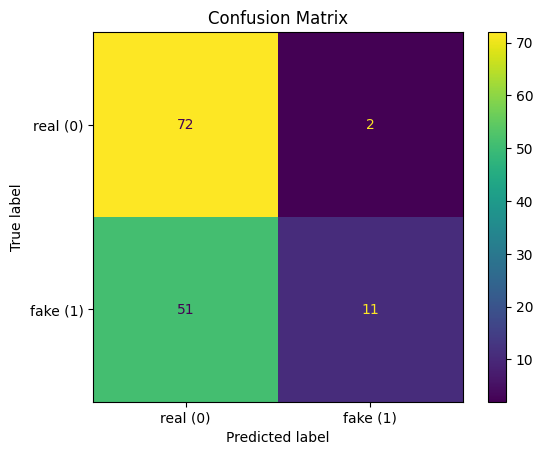

{'accuracy': 0.6102941176470589, 'precision': 0.8461538461538461, 'recall': 0.1774193548387097, 'f1_macro': 0.5121489001692048, 'roc_auc': 0.6706625980819529}


In [1]:
import sys
import os
import pandas as pd
from pathlib import Path
sys.path.insert(0, str(Path.cwd().parent))
from utils.utils import save_experiment, train_and_evaluate_linear_svm, grid_search_joblib, evaluate_model_on_parquet
from configs.config_local import ELEVEN_LABS_FEATURES_PATH, MODELS_PATH

best_model_path = os.path.join(MODELS_PATH, 'linear_svm','exp_20260131_215211', 'model.joblib')
import joblib

model = joblib.load(best_model_path)


itw_test_data_path = os.path.join(ELEVEN_LABS_FEATURES_PATH, "eleven_labs_features_mean_20_128_256_128.parquet")
metrics, metadata_extra = evaluate_model_on_parquet(model, itw_test_data_path, plots=True)
print(metrics)

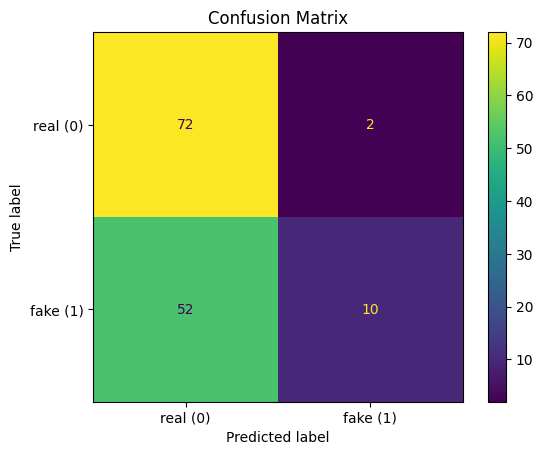

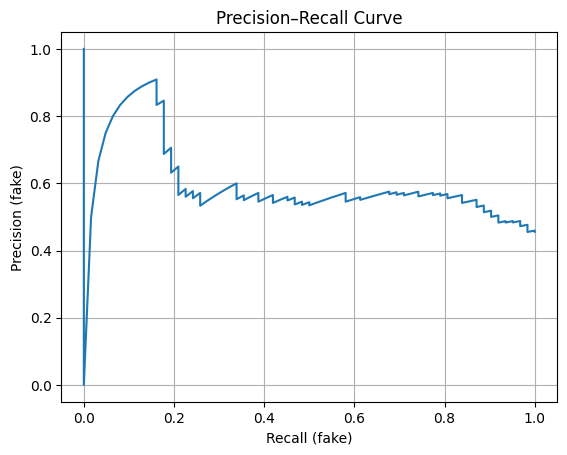

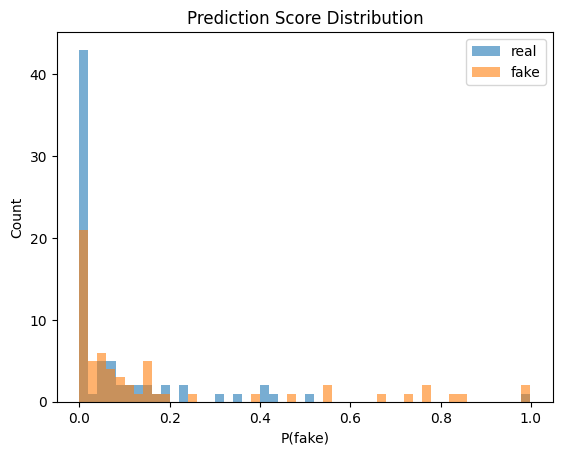

{'accuracy': 0.6029411764705882, 'precision': 0.8333333333333334, 'recall': 0.16129032258064516, 'f1_macro': 0.4987714987714988, 'roc_auc': 0.6540976460331299}


In [2]:
best_model_path = os.path.join(MODELS_PATH, 'logistic_reg','exp_20260131_220429', 'model.joblib')

model = joblib.load(best_model_path)


itw_test_data_path = os.path.join(ELEVEN_LABS_FEATURES_PATH, "eleven_labs_features_mean_20_128_256_128.parquet")
metrics, metadata_extra = evaluate_model_on_parquet(model, itw_test_data_path, plots=True)
print(metrics)

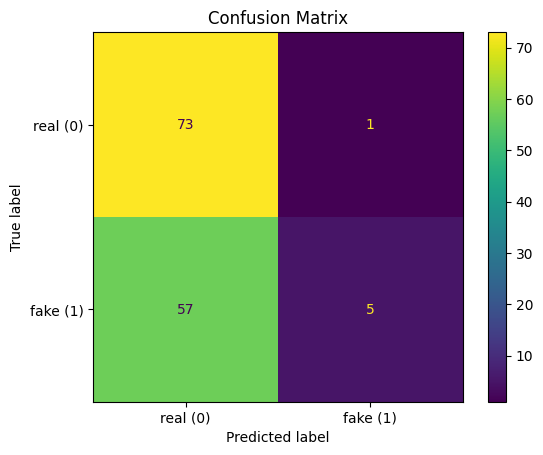

{'accuracy': 0.5735294117647058, 'precision': 0.8333333333333334, 'recall': 0.08064516129032258, 'f1_macro': 0.43137254901960786, 'roc_auc': 0.727332170880558}


In [7]:
best_model_path = os.path.join(MODELS_PATH, 'rbf_svm','exp_20260131_233334', 'model.joblib')
model = joblib.load(best_model_path)


itw_test_data_path = os.path.join(ELEVEN_LABS_FEATURES_PATH, "eleven_labs_features_mean_20_128_256_128.parquet")
metrics, metadata_extra = evaluate_model_on_parquet(model, itw_test_data_path, plots=True)
print(metrics)

c:\Users\Konstantinos\anaconda3\envs\audio_deepfake\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


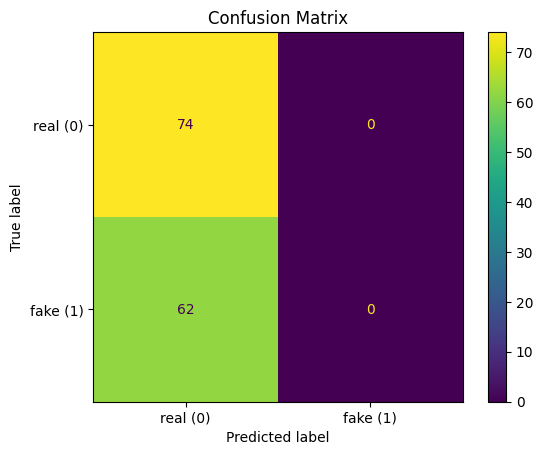

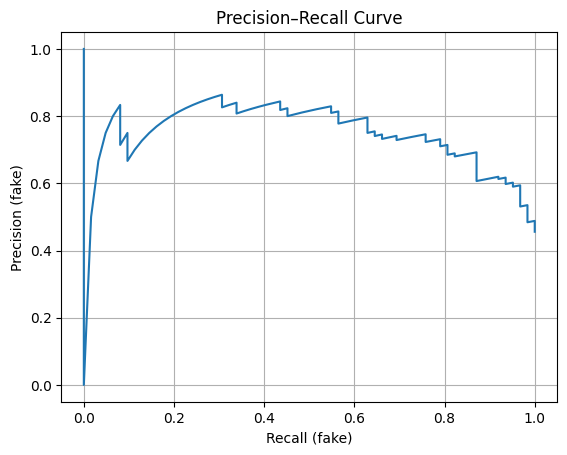

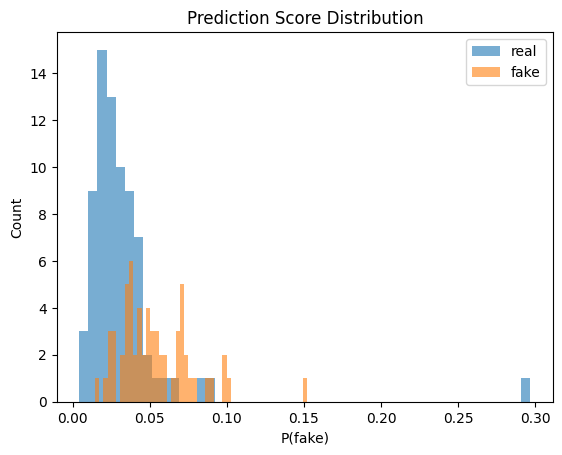

{'accuracy': 0.5441176470588235, 'precision': 0.0, 'recall': 0.0, 'f1_macro': 0.3523809523809524, 'roc_auc': 0.8275937227550131}


In [5]:
best_model_path = os.path.join(MODELS_PATH, 'RF_grid','exp_20260202_135016', 'model.joblib')

model = joblib.load(best_model_path)


itw_test_data_path = os.path.join(ELEVEN_LABS_FEATURES_PATH, "eleven_labs_features_mean_20_128_256_128.parquet")
metrics, metadata_extra = evaluate_model_on_parquet(model, itw_test_data_path, plots=True)
print(metrics)

c:\Users\Konstantinos\anaconda3\envs\audio_deepfake\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


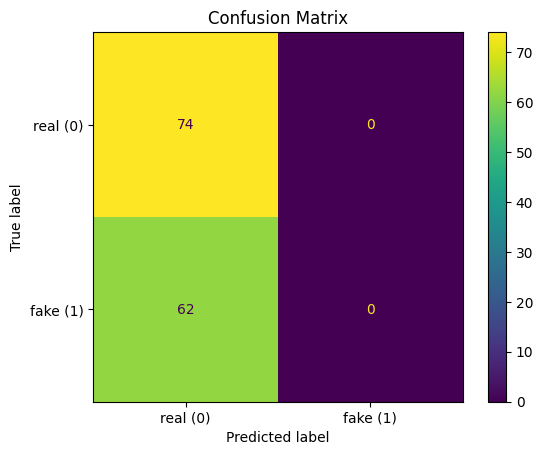

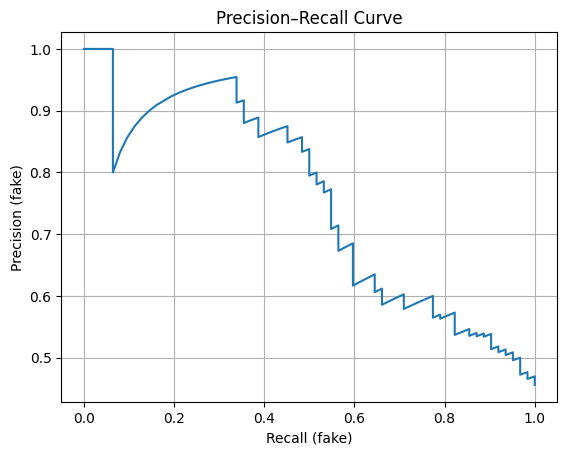

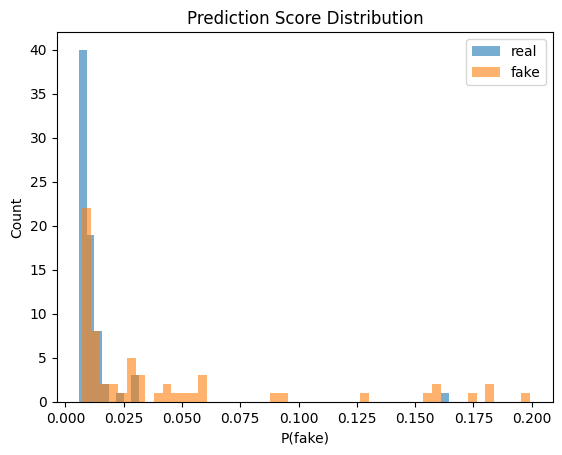

{'accuracy': 0.5441176470588235, 'precision': 0.0, 'recall': 0.0, 'f1_macro': 0.3523809523809524, 'roc_auc': 0.7502179598953792}


In [6]:
best_model_path = os.path.join(MODELS_PATH, 'XGB_grid','exp_20260203_184430', 'model.joblib')
model = joblib.load(best_model_path)


itw_test_data_path = os.path.join(ELEVEN_LABS_FEATURES_PATH, "eleven_labs_features_mean_20_128_256_128.parquet")
metrics, metadata_extra = evaluate_model_on_parquet(model, itw_test_data_path, plots=True)
print(metrics)